#Forewards Kinematics for a 2R robot


In [20]:
#Allgemeine Imports
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
#matplotlib.use("Agg")
from matplotlib.animation import FFMpegWriter
import matplotlib.patches as mpatches

In [21]:
p_l1 = 2.0 # Länge des 1. Roboter Arms
p_l2 = 1.0 # Länge des 2. Roboter Arms

# ////////////////////// Vorwärtskinematik //////////////////////
def p(phi):
    py = np.sin(phi[0]) * p_l1 + np.sin(phi[0]+phi[1]) * p_l2
    px = np.cos(phi[0]) * p_l1 + np.cos(phi[0]+phi[1]) * p_l2
    return px, py




# sollte den Punkt P = (-1/2) ergeben, da beide Winkel 90 Grad sind
theta = [np.pi/2, np.pi/2]
P = p([np.pi/2, np.pi/2])
print(np.round(P, 10))


[-1.  2.]


In [22]:
# Nullstellenform
#///////////////////////// Rückwärtskinematik //////////////////////
def F(t):
    p = np.array([2,1])
    p = np.array([p_l1*np.cos(t[0]) + p_l2 *np.cos(t[0]+t[1]) - P[0], 
                  p_l1*np.sin(t[0]) + p_l2 *np.sin(t[0]+t[1]) - P[1]])
    return p

test_f = F(theta)
#Sollte nun [0, 0] ergeben:
print(test_f)

[0. 0.]


In [23]:
#/////////////////////////// Jacobi-Matrix berechnen ///////////////////////
def jacobi(x):
    J = np.array([[-p_l1*np.sin(x[0])-p_l2*np.sin(x[0]+x[1]),-p_l2*np.sin(x[0]+x[1])],
                  [ p_l1*np.cos(x[0])+p_l2*np.cos(x[0]+x[1]), p_l2*np.cos(x[0]+x[1])]
              ])
    return J


# Newton Function

Ergebnis:  (array([1.57079633, 1.57079633]), array([1.27738667e+00, 2.37274075e-01, 2.76903073e-02, 1.90708450e-04,
       1.81844080e-08, 1.11022302e-16]))


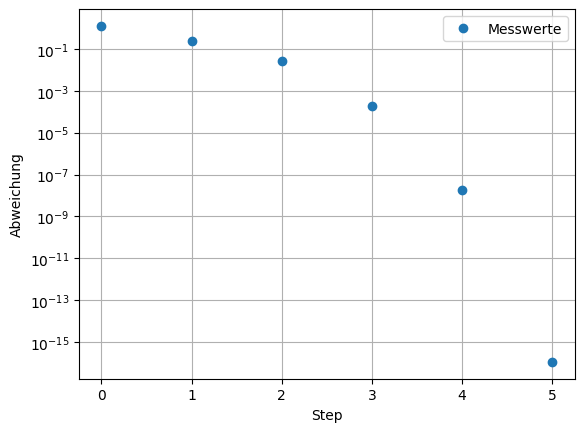

In [24]:



#Teste die Newtoniteration bei Theta1 = Theta2 = pi/2 --> p = [-1, 2]
P = [-1,2]
# Startwert [phi1, phi2]
x0 = np.array([1, 1])

def Newton(x0):
    dimensionx = 2
    dimensiony = 2
    tol = 6.1e-9    # Toleranz mit 14bit genauigkeit
    K = 1000        # Maximale Anzahl an Iterationen    
    k = 0           # Iterationszähler
    r = 0           # Residuum

    J= np.zeros((dimensionx,dimensiony))
    f = np.zeros(dimensionx)
    x = x0
    r = 1
    res_k = np.array([])

    while(r > tol and k < K):
        k = k + 1
        J = jacobi(x)   # Jacobi Matrix berechnen
        y = F(x)        # y-Werte berechnen (Koordinaten)

        # Gleichungssystem lösen
        ATA = np.dot(J.T,J)
        ATB = np.dot(J.T,y) 
        dx = np.linalg.solve(ATA,ATB)
        x = x - dx
        
        r = np.linalg.norm(F(x))                # Residuum berechnen und in Vektor Speichern
        res_k = np.append(res_k,[r],axis= 0)
        #print("Residuum: ", r, "\tAktueller Wert: ", x, "\tParameter: ", dx, "\tIteration: ", k)
     
    return x, res_k
 




# ////////////// Print results //////////////   

print("Ergebnis: ", Newton(x0))

a_k, res_k= Newton(x0)
plt.plot(res_k, 'o', label='Messwerte')

plt.xlabel('Step')
plt.ylabel('Abweichung')
plt.legend()
plt.grid()
plt.yscale("log")
plt.show()

# Animation

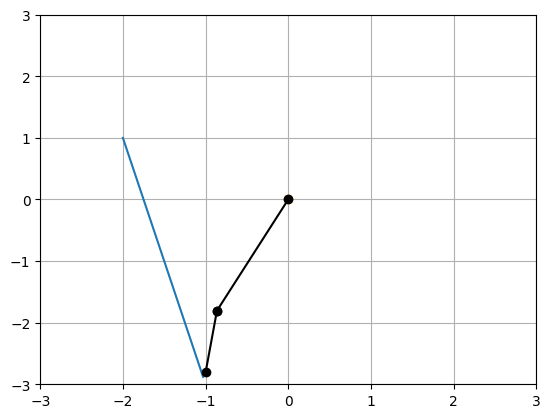

Text(0, 0.5, 'y')

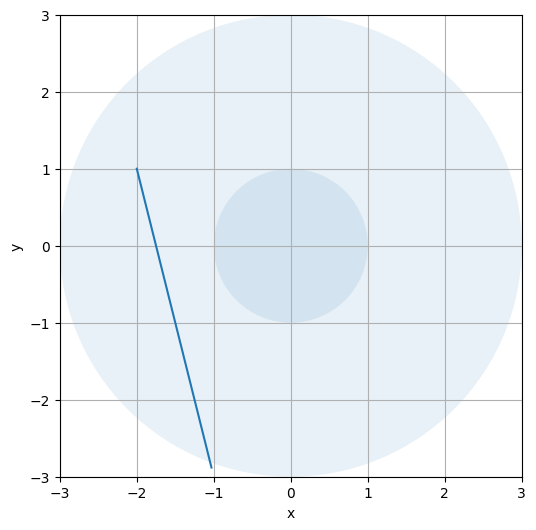

In [25]:
def Bahn(t):
    p0 = np.array([1, -2])
    d = 1/(np.sqrt(17)) * np.array([-4, 1])
    #print(p0 + t*d)
    return p0 + t*d

def draw_robot(n):
    x1 = p_l1 * np.cos(angle[n, 0])
    y1 = p_l1 * np.sin(angle[n, 0])
    x2 = x1 + p_l2 *np.cos(angle[n, 0]+angle[n, 1])
    y2 = y1 + p_l2 *np.sin(angle[n, 0]+angle[n ,1])
    line1, = plt.plot([0, y1], [0, x1], 'ko-')
    line2, = plt.plot([y1, y2], [x1, x2], 'ko-')
    
ak = np.zeros([1,2])
ak = [np.pi, 3*np.pi/2]
zeit_bahn = np.linspace(0,4,401)
P_trajectory = np.zeros([401, 2])
angle = np.zeros([401,2])
P = Bahn(zeit_bahn[0])

for i in range(0, zeit_bahn.shape[0]):
    P = Bahn(zeit_bahn[i])
    P_trajectory[i] = P
    a_k_new, res_k = Newton(a_k)
    angle[i] = a_k_new
    a_k = a_k_new
    #print(a_k, P)

P_x = P_trajectory[:,1]
P_y = P_trajectory[:,0]
#print(angle)
plt.plot(P_x, P_y)
plt.plot(0,0, marker="o", color='orange')
draw_robot(400)
plt.grid()

plt.ylim((-3,3))
plt.xlim((-3,3))
plt.show()


# ==========Simulation des Roboters==========

metadata = dict(title='Trajektorie', artist='HoBrRo',
                comment='Movie')
writer = FFMpegWriter(fps=60, metadata=metadata)

fig = plt.figure(figsize=(6,6))
l1, = plt.plot([], [], 'bo-')
l2, = plt.plot([], [],'ro-')
plt.plot(P_x, P_y)

# p: Funktion zur Berechnung der Punkte auf der Trajektorie
# ti: wird auch für die Berechnung der Winkel benutzt
ti = np.linspace(0,4,int(4/.01+1))
#plt.plot(*np.array([p(tii) for tii in ti]).T)

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.gca().set_aspect(1)
plt.gca().add_patch(mpatches.Circle((0,0), 2-1,alpha=0.1))
plt.gca().add_patch(mpatches.Circle((0,0), 2+1,alpha=0.1))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')




# Lineares Gleichungssystem 2D

In [39]:




def jacobi(x):
    J = np.array([[2*x[0],4*x[1]],[2*np.cos(x[0])*np.sin(x[1]-1),2*np.sin(x[0])*np.cos(x[1]-1)]])
    return J


# Nullstellenform
def F(t):
    p = np.array([[t[0]**2+2*t[1]**2-3],[2*np.sin(t[0])*np.sin(t[1]-1)]])
    return p

# testF


x0 = np.array([1,1])
x0[0]=10
x0[1]=10
a_k, res_k= Newton(x0)
print(ak)
print(res_k)
plt.plot(res_k, 'o', label='Messwerte')

plt.xlabel('Step')
plt.ylabel('Abweichung')
plt.legend()
plt.grid()
plt.show()

ValueError: shapes (2,2,2) and (2,1,2) not aligned: 2 (dim 2) != 1 (dim 1)